## EECS 531 - A2 - E1
### Tristan Maidment - tdm47

#### Goal
The goal for this exercise is to plot the basis functions for the Discrete Cosine Transform (DCT).  These basis functions will be used to represent an image.  This is done by doing a linear combination of the different basis functions at various intensities.

Each of the basis functions is a function of two indices `u` and `v`.  In addition the size of said image is `M` by `M`, where M is any integer.  The general value for M is 8, specifically for JPEG compression.

In [1]:
%matplotlib inline
import scipy as sp
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

First, we must define a function that creates the basis function.  These basis functions are defined by the formula:

\begin{equation*}
    B_{uv} = C(u)C(v)\sum_{m=0}^{M-1}\sum_{m=0}^{M-1}\cos(\frac{\pi(2m+1)u}{2M})\cos(\frac{\pi(2n+1)v}{2M})
\end{equation*}


Note that this equation is somewhat simplified due to the square nature of the basis functions I am plotting.

In addition, the `C(u)` and `C(v)` terms that are defined are ignored for the purpose of this exercise since they simply attenuate the intensity of the first row and column of the basis functions.

#### Implementation

In [2]:
def dct_transform(u, v, M):
    #Cu = 1/np.sqrt(M) if u==0 else np.sqrt(2.0/M)
    #Cv = 1/np.sqrt(N) if v==0 else np.sqrt(2.0/N)
    # not needed, for determening basis function size (i.e. in jpeg)

    J, I = np.meshgrid(range(M), range(M)) # makes the double summation super fast

    T1 = np.cos(np.pi * (u/2.0/M) * (2*I+1)) 
    T2 = np.cos(np.pi * (v/2.0/M) * (2*J+1)) 
    
    return T1 * T2

Now that the basis functions are defined, we define a simple function to plot them in a grid.  

In [3]:
def plot_basis(M, K):
    dct = np.zeros((M * M + ((M-1) * K), M * M + ((M-1) * K)))
    for u in range(M):
        for v in range(M):
            dct[M*u + K*u:M*(u+1) + K*u,M*v + K*v:M*(v+1) + K*v] = dct_transform(u, v, M) + 1 
            #due to the fact that the basis functions can be negative, I add 1 to emphasize the border in the grid
    return dct    

#### Conclusion
The first 64 basis functions are plotted below.  The constrast of each basis function has been increased due to the lack of the `C(u)` and `C(v)` terms.  This makes it easier to see the patterns.

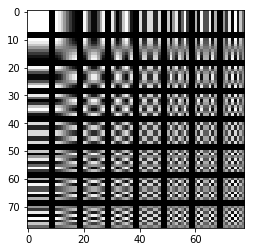

In [4]:
plt.imshow(plot_basis(8, 2), cmap = 'gray')
plt.show()

We can also expand the range of the basis functions.  Below the first 256 basis functions are defined.  In addition, these basis functions are of the size `16*16`.  It is useful to understand that the basis functions can be of variable size.

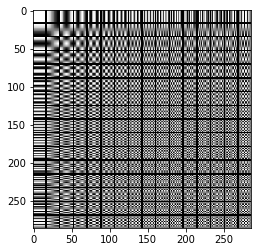

In [5]:
plt.imshow(plot_basis(16, 2), cmap = 'gray')
plt.show()